In [1]:
import pandas as pd
from sklearn.model selection

In [12]:
train = pd.read_csv('clean_train.csv')

In [19]:
x = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [48]:
x = list(train.columns[:7])
x.remove('Demand')
print(x)

['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade', 'Discount_avail']


In [45]:
for i in x:
    train[x] = train[x].astype('category')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Stall_no          6368 non-null   category
 1   Market_Category   6368 non-null   category
 2   Loyalty_customer  6368 non-null   category
 3   Product_Category  6368 non-null   category
 4   Grade             6368 non-null   category
 5   Demand            6368 non-null   int64   
 6   Discount_avail    6368 non-null   category
 7   charges_1         6368 non-null   int64   
 8   charges_2 (%)     6368 non-null   int64   
 9   Minimum_price     6368 non-null   float64 
 10  Maximum_price     6368 non-null   float64 
 11  Selling_Price     6368 non-null   float64 
dtypes: category(6), float64(3), int64(3)
memory usage: 357.8 KB


In [51]:
numeric_ = list(train.columns[7:])
numeric_.append('Demand')
print(numeric_)

['charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price', 'Demand']


<AxesSubplot:xlabel='charges_1'>

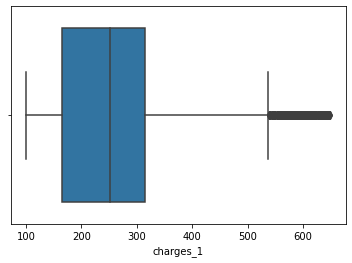

In [54]:
import seaborn as sns
sns.boxplot(train['charges_1'])

<AxesSubplot:xlabel='Minimum_price'>

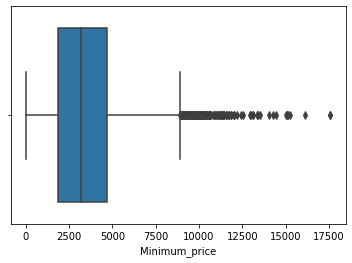

In [56]:
sns.boxplot(train['Minimum_price'])

<AxesSubplot:xlabel='Maximum_price'>

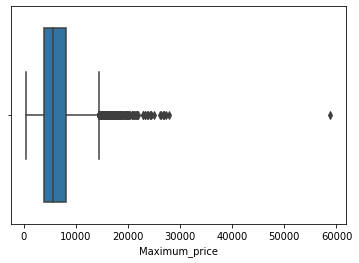

In [57]:
sns.boxplot(train['Maximum_price'])

<AxesSubplot:xlabel='Selling_Price'>

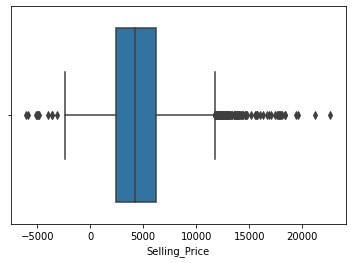

In [58]:
sns.boxplot(train['Selling_Price'])